## Which algorithm did you use , SA or TS?

 I used SA algorithm.

## Add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

In [101]:
from __future__ import print_function
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import numpy

## Distance matrix of the problem (a 9-node random integer matrix for the traveling salesmane problem, ranging from 20 to 60)

In [96]:
np.array(np.random.randint(20,60, size=(9, 9)))

array([[38, 34, 41, 24, 55, 53, 24, 32, 53],
       [24, 31, 24, 32, 40, 27, 43, 27, 38],
       [45, 35, 30, 55, 30, 48, 25, 28, 24],
       [38, 54, 40, 44, 43, 22, 57, 33, 27],
       [44, 20, 58, 53, 55, 59, 46, 40, 37],
       [54, 57, 47, 22, 34, 55, 22, 22, 27],
       [24, 35, 56, 50, 24, 33, 55, 40, 25],
       [39, 40, 53, 28, 51, 48, 33, 37, 50],
       [45, 38, 21, 40, 55, 23, 49, 53, 43]])

## According to t he metaheuristic , indicate any special modification you make and the algorithmic parameters such as cooling schedule and number of iterations at specific temperature in SA, and tabu tenure and frequency penalty in TS.

In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import pdb
 
"旅行商问题 ( TSP , Traveling Salesman Problem )"
coordinates = np.array(np.random.randint(20,60, size=(9, 9)))
 
#得到距离矩阵的函数
def getdistmat(coordinates):
    num = coordinates.shape[0] #52个坐标点
    distmat = np.zeros((9,9)) #52X52距离矩阵
    for i in range(num):
        for j in range(i,num):
            distmat[i][j] = distmat[j][i]=np.linalg.norm(coordinates[i]-coordinates[j])
    return distmat
 
def initpara():
    alpha = 0.99
    t = (1,100)
    markovlen = 1000
 
    return alpha,t,markovlen
num = coordinates.shape[0]
distmat = getdistmat(coordinates) #得到距离矩阵
 
 
solutionnew = np.arange(num)
#valuenew = np.max(num)
 
solutioncurrent = solutionnew.copy()
valuecurrent =1000  #np.max这样的源代码可能同样是因为版本问题被当做函数不能正确使用，应取一个较大值作为初始值
#print(valuecurrent)
 
solutionbest = solutionnew.copy()
valuebest = 1000 #np.max
 
alpha,t2,markovlen = initpara()
t = t2[1]
 
result = [] #记录迭代过程中的最优解


## Exhaustive enumeration
### Hint: you may use nested loops to perform exhaustive enumeration.

In [98]:
"""Simple travelling salesman problem between cities."""

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = numpy.random.randint(20, 60, size=(9, 9))  #
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, assignment):
    """Prints assignment on console."""
    print('Objective: {} miles'.format(assignment.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = assignment.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data['distance_matrix']), data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if assignment:
        print_solution(manager, routing, assignment)


#if __name__ == '__main__':
#    main()
    
while t > t2[0]:
    for i in np.arange(markovlen):
 
        #下面的两交换和三角换是两种扰动方式，用于产生新解
        if np.random.rand() > 0.5:# 交换路径中的这2个节点的顺序
            # np.random.rand()产生[0, 1)区间的均匀随机数
            while True:#产生两个不同的随机数
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1)))
                ## print(loc1,loc2)
                if loc1 != loc2:
                    break
            solutionnew[loc1],solutionnew[loc2] = solutionnew[loc2],solutionnew[loc1]
        else: #三交换
            while True:
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1))) 
                loc3 = np.int(np.ceil(np.random.rand()*(num-1)))
 
                if((loc1 != loc2)&(loc2 != loc3)&(loc1 != loc3)):
                    break
 
            # 下面的三个判断语句使得loc1<loc2<loc3
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
            if loc2 > loc3:
                loc2,loc3 = loc3,loc2
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
 
            #下面的三行代码将[loc1,loc2)区间的数据插入到loc3之后
            tmplist = solutionnew[loc1:loc2].copy()
            solutionnew[loc1:loc3-loc2+1+loc1] = solutionnew[loc2:loc3+1].copy()
            solutionnew[loc3-loc2+1+loc1:loc3+1] = tmplist.copy()  
 
        valuenew = 0
        for i in range(num-1):
            valuenew += distmat[solutionnew[i]][solutionnew[i+1]]
        valuenew += distmat[solutionnew[0]][solutionnew[0]]
       # print (valuenew)
        if valuenew<valuecurrent: #接受该解
           
            #更新solutioncurrent 和solutionbest
            valuecurrent = valuenew
            solutioncurrent = solutionnew.copy()
 
            if valuenew < valuebest:
                valuebest = valuenew
                solutionbest = solutionnew.copy()
        else:#按一定的概率接受该解
            if np.random.rand() < np.exp(-(valuenew-valuecurrent)/t):
                valuecurrent = valuenew
                solutioncurrent = solutionnew.copy()
            else:
                solutionnew = solutioncurrent.copy()
    t = alpha*t
    result.append(valuebest)
    print (t) #程序运行时间较长，打印t来监视程序进展速度
#用来显示结果
#plt.plot(np.array(result))
#plt.ylabel("Best Value")
#plt.xlabel("t")
#plt.show()

99.0
98.01
97.0299
96.059601
95.09900499
94.1480149401
93.206534790699
92.27446944279201
91.35172474836409
90.43820750088045
89.53382542587164
88.63848717161292
87.75210229989679
86.87458127689783
86.00583546412885
85.14577710948755
84.29431933839268
83.45137614500875
82.61686238355867
81.79069375972308
80.97278682212585
80.1630589539046
79.36142836436555
78.56781408072189
77.78213593991467
77.00431458051553
76.23427143471037
75.47192872036327
74.71720943315964
73.97003733882804
73.23033696543976
72.49803359578536
71.7730532598275
71.05532272722922
70.34476949995693
69.64132180495736
68.94490858690779
68.25545950103871
67.57290490602833
66.89717585696805
66.22820409839836
65.56592205741438
64.91026283684023
64.26116020847184
63.618548606387115
62.98236312032324
62.35253948912001
61.72901409422881
61.11172395328652
60.500606713753655
59.89560064661612
59.29664464014996
58.70367819374846
58.116641411810974
57.535474997692866
56.960120247715935
56.390519045238776
55.82661385478639
55.2683

1.0537635028579868
1.0432258678294068
1.0327936091511127
1.0224656730596016
1.0122410163290056
1.0021186061657157
0.9920974201040585


## Optimization result (optimal tour and the shortest distance and convergence history)

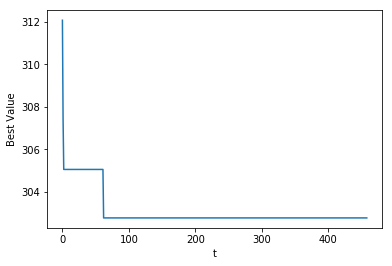

Objective: 234 miles
Route for vehicle 0:
 0 -> 4 -> 5 -> 1 -> 7 -> 6 -> 8 -> 2 -> 3 -> 0



In [100]:
#用来显示结果
plt.plot(np.array(result))
plt.ylabel("Best Value")
plt.xlabel("t")
plt.show()

if __name__ == '__main__':
    main()

## References
1. [Introduction to Numpy](https://en.wikipedia.org/wiki/NumPy)
2. [Simulated Annealing in TSP problem](https://blog.csdn.net/qq_34798326/article/details/79013338)
3. [TSP problem in Python](https://blog.csdn.net/h9f3d3/article/details/80807064 )
4. [Use Simulated Annealing algorithm to solve TSP problem in Python](https://blog.csdn.net/qq_34798326/article/details/79013338)
5. [Use dynamic modeling to solve TSP problem in Python 1](https://blog.csdn.net/yg838457845/article/details/81127697)
6. [Use dynamic modeling to solve TSP problem in Python 2](https://blog.csdn.net/h9f3d3/article/details/80807064)
7. [Visualisation of Simulated Annealing algorithm to solve the Travelling Salesman Problem in Python](https://github.com/jedrazb/python-tsp-simulated-annealing)
8. [Traveling Salesman Problem Solver using Simulated Annealing Algorithm](https://github.com/ildoonet/simulated-annealing-for-tsp)
9. [Simulated Annealing algorithm to solve Travelling Salesman Problem in Python](https://github.com/chncyhn/simulated-annealing-tsp)